# IMM - Taller No 6 (17/09/2024)

---
---
##1. Repaso regresión lineal

<font color='red'> Repasar los conceptos de regresión lineal y de cambio de variables para "linealizar" </font>

### 1.1 Definición:

Técnica de modelado estadístico que se utiliza para describir una *variable de respuesta* en función de una o más *variables predictoras*.

- En una *regresión lineal simple* se utiliza un predictor $x$ para describir una variable de respuesta $y$,   a través de la ecuación general
$$y = \beta_0 + \beta_1\,x$$

- Los parámetros $\beta_0$ (*intercepto*) y $\beta_1$ (*pendiente*, *razón de cambio*) son los *parámetros de regresión*

- Los parámetros de regresión se evalúan a partir del conjunto de datos disponibles $\{(x_i,y_i),\,i=1,\dots,n\}$

- **Estimación de los parámetros**: La estimación de $\beta_0$ y $\beta_1$ se realiza mediante el *método de mínimos cuadrados*

###1.2. Cambios de variable - Modelos de ajuste exponencial y de potencia

**1.2.1 Relación exponencial**

- La relación entre las variables $x$ e $y$ se puede expresar como

 $$y = b\cdot {\rm e}^{a\cdot x}= b\cdot \exp(a\cdot x),$$

 donde  $a$ y $b$ son valores constantes (*parámetros del modelo*).

- Transformado las variables es posible extraer una relación lineal

 $${\color{red}{\ln(y)}} = {\color{blue}{\ln(b)}} + a\cdot x    $$

 $${\color{red} Y} = {\color{blue}B} + a\cdot x$$

- Con un análisis de regresión lineal de los datos $(x, Y)$ se pueden estimar   $a$ y $b$ a partir de la pendiente y el intercepto de la recta ajustada

**1.2.1 Relación potencial**

- La relación entre las variables $x$ e $y$ se puede expresar como

 $$y = b\cdot x^a,$$

 donde $a$ y $b$ son valores constantes (*parámetros del modelo*).

- Transformado las variables es posible extraer una relación lineal

 $${\color{red}{\ln(y)}} = {\color{blue}{\ln(b)}} + a\cdot {\color{green}{\ln(x)}}    $$

 $${\color{red} Y} = {\color{blue}B} + a\cdot  {\color{green}X}$$

- Con un análisis de regresión lineal de los datos $(X, Y)$ se pueden estimar los parámetros del modelos $a$ y $b$ a partir de la pendiente y el intercepto de la recta ajustada


---
---
---
## 2. Interpolación de Lagrange

<font color='red'> Repasar los conceptos de interpolación  </font>

### 2.1 Definición

Suponga que se tiene una serie de datos (observaciones)

 $$\{(x_j, y_j), j=0,1,\dots,n \},$$

 con $x_j \ne x_i$ si $j\ne i$ (es decir, todos los valores de $x$ son distintos).

- Para modelar dichos datos, se quiere encontrar una función que permita establecer una relación $y = f(x)$ entre ellos, **restringida a la condición $y_i=f(x_i)$ para todo $i$**

- Tal función se puede construir usando la técnica de [*interpolación polinomial*](https://es.wikipedia.org/wiki/Interpolaci%C3%B3n_polin%C3%B3mica), en la que $f(x)$ es un polinomio de grado $n$, es decir,

 $$f(x) = a_0 + a_1 x + a_2 x^2 +\dots + a_n x^n $$

- Una de estas técnicas hace uso del *polinomio interpolante en la forma de Lagrange* $P(x)$, definido como

 $$P(x) = \sum_{j=0}^n\, y_j \cdot  L_j(x)$$

  donde $L_j(x)$ representa la *base polinómica de Lagrange*

- Esta base a su vez se define a partir de los datos usando la expresión

 $$L_j(x) = \prod_{i=0,\,i\ne j}^n \frac{x-x_i}{x_j-x_i}$$



---
### 2.2 Ejemplo de evaluación del "polinómio interpolante"


**Problema:** Dado el conjunto de datos presentado en la tabla

| x | | y
|-------| |-----------
|-2.0 | |  6.1
|-1.0 | |  5.4
| 0.0 | |  4.2
| 1.0 | | -2.0
| 2.0 | | -1.5
| 3.0 | |  1.4


Realize un programa en python que realize lo siguiente:

- Definir las funciones la base de Lagrange

- Construir la función el polinómio interpolante de Lagrange

- Graficar el polinomio interpolante y verificar que pasa por los nodos.


**2.2.1 Solución usando funciones definidas por el usuario**






In [13]:
# Importa las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
# Define el estilo y tamañode las gráficas
plt.style.use ('default')
#plt.style.use ('seaborn-poster')
plt.rcParams['figure.figsize'] = [5, 2.8]

- **Primer paso: definición de la base de Lagrange**



In [14]:
def base_lagrange(x_variable, x_datos, j):
  # Define la base polinómica de Lagrange
  # para los datos x_datos dados
  n = len(x_datos)
  i = 0
  Lj_base = 1
  while i < n:
    if(i!=j):
      # Producto
      factor_i = ( x_variable-x_datos[i] ) / ( x_datos[j]-x_datos[i] )
      Lj_base = Lj_base * factor_i
    i += 1
  return Lj_base

- **Segundo paso: construcción del polinomio interpolante**

In [15]:
def polinomio_interpolador(x_variable, x_datos, y_datos):
  # Define el polinómio interpolador para los datos x_datos, y datos
  # con la base polinómica de Lagrange
  n = len(x_datos)
  j = 0
  polinomio = 0
  while j < n:
    # Sumatoria
    polinomio += y_datos[j]*base_lagrange(x_variable, x_datos, j)
    j += 1
  return polinomio

- **Tercer paso: aplicación a los datos dados**

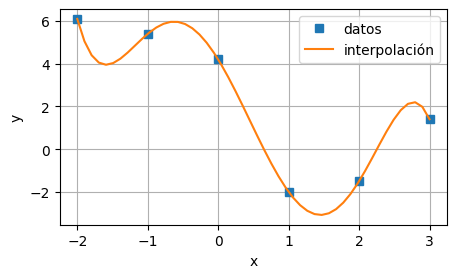

In [18]:
# Datos de las variables
x_datos = np.array([-2,-1,0,1,2,3])
y_datos = np.array([6.1, 5.4, 4.2, -2, -1.5,1.4])

# Valores de x para evaluar el polinomio interpolante
# (función definida por el usuario)
xmin = np.min(x_datos)
xmax = np.max(x_datos)
x_interpolacion = np.linspace(xmin,xmax,50)
y_interpolacion = polinomio_interpolador(x_interpolacion, x_datos, y_datos)

# Visualización de los datos
plt.plot(x_datos,y_datos,'s',label='datos')
plt.plot(x_interpolacion, y_interpolacion,'-',label='interpolación')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

**2.2.1 Solución usando funciones predeterminadas (librería *SciPy)***


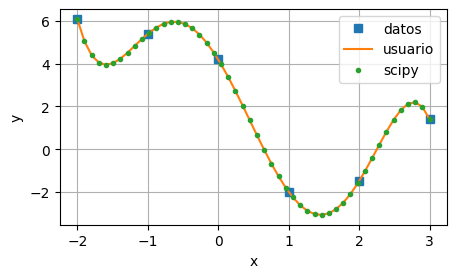

In [19]:
# Empleando herramientas predefinidas en la librería scipy
import scipy.interpolate as spy

# Evalúa los coeficientes del polinomio interpolador
polinomio_de_lagrange = spy.lagrange(x_datos, y_datos)
# Evalúa el polinomio interpolador para x_interpolacion
y_interpolacion_spy = polinomio_de_lagrange(x_interpolacion)

plt.plot(x_datos,y_datos,'s',label='datos')
plt.plot(x_interpolacion, y_interpolacion, '-', label='usuario')
plt.plot(x_interpolacion, y_interpolacion_spy, '.', label='scipy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()